# Chapter 7: IoT Security

# Use Case 2: Network Intrusion Detection

# Model: Simple DNN

# Step 1: Data Collection (downloading)

# Step 2: Pre-processing

# Step 3: Model Training and Validation

# Data loading and preparation for Training

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score)
from sklearn.preprocessing import Normalizer
#import h5py
from keras import callbacks
from keras.callbacks import CSVLogger
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix

# Load the pre-processed training and test data
traindata = pd.read_csv('dataset-kdd/Training.csv', header=None)
testdata = pd.read_csv('dataset-kdd/Testing.csv', header=None)

## For OMP error
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,0]
C = testdata.iloc[:,0]
T = testdata.iloc[:,1:42]

scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train = np.array(Y)
y_test = np.array(C)


X_train = np.array(trainX)
X_test = np.array(testT)

batch_size = 64


Using TensorFlow backend.


# Model Generation and Training

In [2]:
# Generate or define the netwrok
model = Sequential()
model.add(Dense(1024,input_dim=41,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Use tensorboad to log files
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

checkpointer = callbacks.ModelCheckpoint(filepath="dnn-kdd-results/checkpoint-{epoch:02d}.hdf5", 
                                         verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('dnn-kdd-results/training_set_dnnanalysis.csv',separator=',', append=False)
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=1, callbacks=[checkpointer,csv_logger, tensorboard])
model.save("dnn-kdd-results/dnn_model.hdf5")


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/Users/raz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
494021/494021 [==============================] - 719s 1ms/step - loss: 0.0137 - acc: 0.9957

Epoch 00001: loss improved from inf to 0.01371, saving model to dnn-kdd-results/checkpoint-01.hdf5


# Performance Evaluation/Validation

----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
----------------------------------------------
accuracy
0.925
[[ 60207    386]
 [ 22920 227516]]


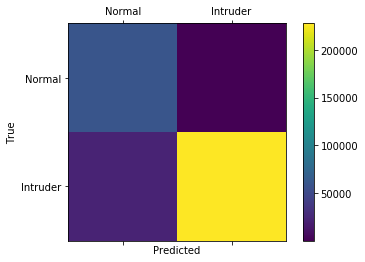

In [3]:
# Validation & Confusion Matrix
score = []
name = []

for file in os.listdir("dnn-kdd-results"):
  model.load_weights("dnn-kdd-results/checkpoint-02.hdf5")
  y_train1 = y_test
  y_pred = model.predict_classes(X_test)
  accuracy = accuracy_score(y_train1, y_pred)
  recall = recall_score(y_train1, y_pred , average="binary")
  precision = precision_score(y_train1, y_pred , average="binary")
  f1 = f1_score(y_train1, y_pred, average="binary")
  print("----------------------------------------------")
  print("accuracy")
  print("%.3f" %accuracy)
  score.append(accuracy)
  name.append(file)


model.load_weights("dnn-kdd-results/"+name[score.index(max(score))])
pred = model.predict_classes(X_test)
proba = model.predict_proba(X_test)
np.savetxt("dnn-kdd-results/dnn4predicted.txt", pred)
np.savetxt("dnn-kdd-results/dnn4probability.txt", proba)

accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred , average="binary")
precision = precision_score(y_test, pred , average="binary")
f1 = f1_score(y_test, pred, average="binary")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)

### Confusion Matrix 
import matplotlib.pylab as plt
# This is to show plot 
%matplotlib inline
matrix = confusion_matrix(y_test, y_pred)
print (matrix)

#Plotting the Confusion Matrix
labels = ['Normal', 'Intruder']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
